An example of how to propagate flux generated at the annihilation/decay spot. 

#Author: Q.R Liu

#Make sure you can run nuSQUIDs

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
from charon import charon
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

ImportError: /home/jlazar/.local/lib/python2.7/site-packages/h5py/_errors.so: undefined symbol: PyUnicodeUCS2_FromStringAndSize

First we construct the object

In [3]:
#info of DM
channel = 'WW'
mass    = 1000.
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin         = 1.
Emax         = mass
nodes        = 100
bins         = 300

#info of oscillation parameters
theta_12=33.58
theta_13=9.12
theta_23=40.4
delta_m_12=7.58e-5
delta_m_13=2.35e-3
delta = 0.


#linear binning 
logscale = False #default
#include interactions
interactions = True #default

#construct the flux object.
Flux = charon.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta)

First we can plot the $\nu_\mu$ flux at production. (flavors: nu_e, nu_e_bar, nu_mu, nu_mu_bar, nu_tau, nu_tau_bar) 

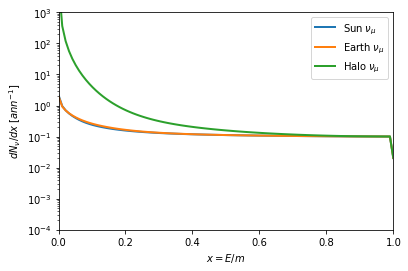

In [4]:
flux_ini_sun   = Flux.iniFlux('Sun')
flux_ini_earth = Flux.iniFlux('Earth')
flux_ini_Halo  = Flux.iniFlux('Halo')


x = Flux.iniE()/mass
plt.plot(x,flux_ini_sun['nu_mu'],linewidth=2.0,label=r'${\rm{Sun}}\;\nu_\mu$')
plt.plot(x,flux_ini_earth['nu_mu'],linewidth=2.0,label=r'${\rm{Earth}}\;\nu_\mu$')
plt.plot(x,flux_ini_Halo['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')

plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

propagate the flux

In [5]:
t0 = time.time()
flux_det_sun = Flux.Sun('detector',zenith=np.pi/6.,avg=True)
print 'from Sun center to Earth surface, time duration:'
print time.time()-t0, 's'

t0 = time.time()
flux_det_Earth = Flux.Earth('detector',avg=True)
print 'from Earth center to Earth surface, time duration:'
print time.time()-t0, 's'

t0 = time.time()
flux_det_Halo = Flux.Halo('detector',zenith=np.pi)
print 'averaged propagation, time duration:'
print time.time()-t0, 's'

from Sun center to Earth surface, time duration:
225.092434168 s
from Earth center to Earth surface, time duration:
20.381248951 s
averaged propagation, time duration:
24.9891369343 s


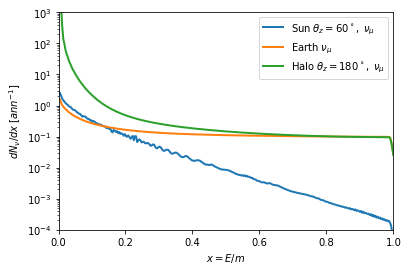

In [6]:
x = flux_det_sun['Energy']/mass
plt.plot(x,flux_det_sun['nu_mu'],linewidth=2.0,label=r'${\rm{Sun}}\;\theta_z=60^\circ,\;\nu_\mu$')
plt.plot(x,flux_det_Earth['nu_mu'],linewidth=2.0,label=r'${\rm{Earth}}\;\nu_\mu$')
plt.plot(x,flux_det_Halo['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\theta_z=180^\circ,\;\nu_\mu$')

plt.ylim(1e-4,1e3)
plt.yscale('log')
plt.xlim(0.0,1.0)
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

Then we show propagating external flux at 1000 GeV through bb channel to SunSurface and 1AU. The external flux should be in dat file with 7 columns corresponding to $E_\nu,\; \nu_e,\;\bar{\nu}_e,\;\nu_\mu,\;\bar{\nu}_\mu,\;\nu_\tau,\;\bar{\nu}_\tau$.

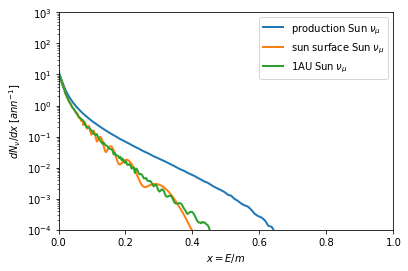

In [7]:
#path to the external flux file
path = 'bb_1000_Sun_ann.dat'
Flux_external = charon.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathFlux=path)

flux_ini_sun_external   = Flux_external.iniFlux('Sun')
flux_sfc_sun_external   = Flux_external.Sun('SunSurface',avg=True)
flux_AU_sun_external    = Flux_external.Sun('1AU',avg=True)

x = Flux_external.iniE()/mass
plt.plot(x,flux_ini_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{production\;Sun}}\;\nu_\mu$')
plt.plot(flux_sfc_sun_external['Energy']/mass,flux_sfc_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{sun\;surface\;Sun}}\;\nu_\mu$')
plt.plot(flux_AU_sun_external['Energy']/mass,flux_AU_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{1AU\;Sun}}\;\nu_\mu$')



plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

We can also read external cross section files by setting

$NuFlux(xsec = path\_to\_xsec\_files)$ when constructing the flux object. 

xsec files should include energy differential cross sections in $n\_dsde\_CC.dat$, $n\_dsde\_NC.dat$, $p\_dsde\_CC.dat$, $p\_dsde\_NC.dat$ 

and total cross sections in $n\_sigma\_CC.dat$, $n\_sigma\_NC.dat$, $p\_sigma\_CC.dat$, $p\_sigma\_NC.dat$.

Other Sun/Earth models are also applicable by setting

$NuFlux(pathModel = path\_to\_model\_file)$ when constructing the flux object. 

The model file should have the same format as the Sun/Earth model file in $../propagate/models/$.

================================================================================

End. ヾ(๑╹ꇴ◠๑)ﾉ" 